In [1]:
# Supress warnings

import warnings
warnings.filterwarnings('ignore')

C:\Users\Lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


# Step 1: Reading, understanding,preperation and EDA 

Let us first import Numpy and Pandas and read the housing dataset

In [2]:
import numpy as np
import pandas as pd

In [3]:
US_car_pricing = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
# check the head of the dataset
US_car_pricing.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Inspect various aspects of the us_car_pricing dataframe

In [5]:
# checking dimension of dataframe
US_car_pricing.shape

(205, 26)

In [6]:
US_car_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [7]:
# make sure that number of duplicate rows are zero
# get the unique values (rows)
US_car_pricing.drop_duplicates()
US_car_pricing.shape


(205, 26)

The shape is not changed hence there is no duplicate rows

In [8]:
# checking NA values in the dataset
print (US_car_pricing.isnull().sum())  
print (US_car_pricing.isnull().values.any())
print (US_car_pricing.isnull().values.sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64
False
0


In [9]:
# creating a newcolumn "Company_name" and "Car_Model" from "CarName" column

US_car_pricing['CarName'] = US_car_pricing['CarName'].str.split(' ')
US_car_pricing['Company_Name'] = US_car_pricing['CarName'].apply(lambda x: x[0])
US_car_pricing['Car_Model'] = US_car_pricing['CarName'].apply(lambda x: x[1] if len(x) > 1 else x[0])
US_car_pricing.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company_Name,Car_Model
0,1,3,"[alfa-romero, giulia]",gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,"[alfa-romero, stelvio]",gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,"[alfa-romero, Quadrifoglio]",gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,"[audi, 100, ls]",gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100
4,5,2,"[audi, 100ls]",gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [10]:

US_car_pricing.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company_Name,Car_Model
0,1,3,"[alfa-romero, giulia]",gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,"[alfa-romero, stelvio]",gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,"[alfa-romero, Quadrifoglio]",gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,"[audi, 100, ls]",gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100
4,5,2,"[audi, 100ls]",gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [11]:
# drop 'CarName' from the 'US_car_pricing' dataset
US_car_pricing.drop(['CarName'], axis = 1, inplace = True)

In [12]:
#importing libraries for visualising the data using 'matplotlib' and 'seaborn'
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# checking unique values in columns for dummy variable creation
d = {}
for col in US_car_pricing:
    d[col] = US_car_pricing[col].unique()
    
d

{'car_ID': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176

Creating Dummy variables

The variables having 2 levels are as follows
    1.fueltype
    2.aspiration
    3.doornumber
    4.enginelocation

In [14]:
#replacing fueltype column values- gas --> 0 and diesel --> 1
US_car_pricing["fueltype"].replace(['gas','diesel'],[0,1],inplace=True)



In [15]:
#replacing fueltype column values- std --> 0 and turbo --> 1
US_car_pricing['aspiration'].replace(['std','turbo'],[0,1],inplace=True)



In [16]:
#replacing fueltype column values- two --> 0 and four --> 1
US_car_pricing['doornumber'].replace(['two','four'],[0,1],inplace=True)



In [17]:
#replacing fueltype column values- front --> 0 and rear --> 1
US_car_pricing['enginelocation'].replace(['front', 'rear'],[0,1],inplace=True)

Creating Dummy variables for columns having 3 or more levels of variables
1. Company_Name
2. carbody
3. drivewheel
4. enginetype
5. cylindernumber
6. fuelsystem
7. symboling


In [18]:
#get dummy variables for 'Company_Name' and storing it into a new variable 'dummy1'
dummy1 = pd.get_dummies(US_car_pricing['Company_Name'])
dummy1 = dummy1.astype(float)
#add 'dummy1' to the 'US_car_pricing' dataset
US_car_pricing = pd.concat([US_car_pricing,dummy1], axis = 1)

# drop 'Company_Name' from the 'US_car_pricing' dataset
US_car_pricing.drop(['Company_Name'], axis = 1, inplace = True)

In [19]:
#get dummy variables for 'carbody' and storing it into a new variable 'dummy2'
dummy2 = pd.get_dummies(US_car_pricing['carbody'])
dummy2 = dummy2.astype(float)
#add 'dummy2' to the 'US_car_pricing' dataset
US_car_pricing = pd.concat([US_car_pricing,dummy2], axis = 1)

# drop 'carbody' from the 'US_car_pricing' dataset
US_car_pricing.drop(['carbody'], axis = 1, inplace = True)

In [20]:
#get dummy variables for 'drivewheel' and storing it into a new variable 'dummy3'
dummy3 = pd.get_dummies(US_car_pricing['drivewheel'])
dummy3 = dummy3.astype(float)
#add 'dummy3' to the 'US_car_pricing' dataset
US_car_pricing = pd.concat([US_car_pricing,dummy3], axis = 1)

# drop 'drivewheel' from the 'US_car_pricing' dataset
US_car_pricing.drop(['drivewheel'], axis = 1, inplace = True)

US_car_pricing.rename(columns={'rwd':'rwd_drivewheel'}, inplace=True)
US_car_pricing.rename(columns={'fwd':'fwd_drivewheel'}, inplace=True)
US_car_pricing.rename(columns={'4wd':'4wd_drivewheel'}, inplace=True)


In [21]:
#get dummy variables for 'enginetype' and storing it into a new variable 'dummy4'
dummy4 = pd.get_dummies(US_car_pricing['enginetype'])
dummy4 = dummy4.astype(float)
#add 'dummy4' to the 'US_car_pricing' dataset
US_car_pricing = pd.concat([US_car_pricing,dummy4], axis = 1)

# drop 'enginetype' from the 'US_car_pricing' dataset
US_car_pricing.drop(['enginetype'], axis = 1, inplace = True)

US_car_pricing.rename(columns={'dohc':'enginetype_dohc'}, inplace=True)
US_car_pricing.rename(columns={'ohcv':'enginetype_ohcv'}, inplace=True)
US_car_pricing.rename(columns={'ohc':'enginetype_ohc'}, inplace=True)
US_car_pricing.rename(columns={'l':'enginetype_l'}, inplace=True)
US_car_pricing.rename(columns={'rotor':'enginetype_rotor'}, inplace=True)
US_car_pricing.rename(columns={'ohcf':'enginetype_ohcf'}, inplace=True)
US_car_pricing.rename(columns={'dohcv':'enginetype_dohcv'}, inplace=True)




In [22]:
#get dummy variables for 'cylindernumber' and storing it into a new variable 'dummy5'
dummy5 = pd.get_dummies(US_car_pricing['cylindernumber'])
dummy5 = dummy5.astype(float)
#add 'dummy5' to the 'US_car_pricing' dataset
US_car_pricing = pd.concat([US_car_pricing,dummy5], axis = 1)

# drop 'cylindernumber' from the 'US_car_pricing' dataset
US_car_pricing.drop(['cylindernumber'], axis = 1, inplace = True)

US_car_pricing.rename(columns={'four':'cylindernumber_four'}, inplace=True)
US_car_pricing.rename(columns={'six':'cylindernumber_six'}, inplace=True)
US_car_pricing.rename(columns={'five':'cylindernumber_five'}, inplace=True)
US_car_pricing.rename(columns={'three':'cylindernumber_three'}, inplace=True)
US_car_pricing.rename(columns={'twelve':'cylindernumber_twelve'}, inplace=True)
US_car_pricing.rename(columns={'two':'cylindernumber_two'}, inplace=True)
US_car_pricing.rename(columns={'eight':'cylindernumber_eight'}, inplace=True)



In [23]:
#get dummy variables for 'fuelsystem' and storing it into a new variable 'dummy6'
dummy6 = pd.get_dummies(US_car_pricing['fuelsystem'])
dummy6 = dummy6.astype(float)
#add 'dummy6' to the 'US_car_pricing' dataset
US_car_pricing = pd.concat([US_car_pricing,dummy6], axis = 1)

# drop 'fuelsystem' from the 'US_car_pricing' dataset
US_car_pricing.drop(['fuelsystem'], axis = 1, inplace = True)

In [24]:
#get dummy variables for 'symboling' and storing it into a new variable 'dummy7'
dummy7 = pd.get_dummies(US_car_pricing['symboling'])
dummy7 = dummy7.astype(float)
#add 'dummy7' to the 'US_car_pricing' dataset
US_car_pricing = pd.concat([US_car_pricing,dummy7], axis = 1)

# drop 'symboling' from the 'US_car_pricing' dataset
US_car_pricing.drop(['symboling'], axis = 1, inplace = True)




In [25]:
US_car_pricing.rename(columns={'3':'Symboling_3'}, inplace=True)
US_car_pricing.rename(columns={'2':'Symboling_2'}, inplace=True)
US_car_pricing.rename(columns={'1':'Symboling_1'}, inplace=True)
US_car_pricing.rename(columns={'0':'Symboling_0'}, inplace=True)
US_car_pricing.rename(columns={'-3':'Symboling_-3'}, inplace=True)
US_car_pricing.rename(columns={'-2':'Symboling_-2'}, inplace=True)
US_car_pricing.rename(columns={'-1':'Symboling_-1'}, inplace=True)

In [26]:
# drop 'Car_Model' from the 'US_car_pricing' dataset
US_car_pricing.drop(['Car_Model'], axis = 1, inplace = True)

In [27]:
# drop 'car_ID' from the 'US_car_pricing' dataset
US_car_pricing.drop(['car_ID'], axis = 1, inplace = True)

In [28]:
US_car_pricing.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,mfi,mpfi,spdi,spfi,-2,-1,0,1,2,3
0,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,0,94.5,171.2,65.5,52.4,2823,152,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0,1,0,99.8,176.6,66.2,54.3,2337,109,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0,1,0,99.4,176.6,66.4,54.3,2824,136,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Step 3: Splitting the data into training and testing sets

In [29]:
from sklearn.model_selection import train_test_split

# we specify this so that the train and test data set alwaus have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(US_car_pricing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [30]:
# Rescaling the features using Min-Max scaler

from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [32]:
# apply scaler() to all the columns except the '0-1' and 'dummy variables'

num_vars = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio',
'stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [33]:
df_train.columns

Index([             'fueltype',            'aspiration',
                  'doornumber',        'enginelocation',
                   'wheelbase',             'carlength',
                    'carwidth',             'carheight',
                  'curbweight',            'enginesize',
                   'boreratio',                'stroke',
            'compressionratio',            'horsepower',
                     'peakrpm',               'citympg',
                  'highwaympg',                 'price',
                      'Nissan',           'alfa-romero',
                        'audi',                   'bmw',
                       'buick',             'chevrolet',
                       'dodge',                 'honda',
                       'isuzu',                'jaguar',
                       'maxda',                 'mazda',
                     'mercury',            'mitsubishi',
                      'nissan',               'peugeot',
                    'plymouth',

In [34]:
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,mfi,mpfi,spdi,spfi,-2,-1,0,1,2,3
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.090909,0.181818,0.559441,0.006993,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,...,0.0,0.440559,0.041958,0.0,0.013986,0.090909,0.349650,0.300699,0.118881,0.125874
std,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,...,0.0,0.498199,0.201198,0.0,0.117845,0.288490,0.478536,0.460174,0.324786,0.332873
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,...,0.0,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dividing into X and Y sets for model building

In [35]:
y_train = df_train.pop('price')
X_train = df_train

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 81 columns):
fueltype                 143 non-null int64
aspiration               143 non-null int64
doornumber               143 non-null int64
enginelocation           143 non-null int64
wheelbase                143 non-null float64
carlength                143 non-null float64
carwidth                 143 non-null float64
carheight                143 non-null float64
curbweight               143 non-null float64
enginesize               143 non-null float64
boreratio                143 non-null float64
stroke                   143 non-null float64
compressionratio         143 non-null float64
horsepower               143 non-null float64
peakrpm                  143 non-null float64
citympg                  143 non-null float64
highwaympg               143 non-null float64
Nissan                   143 non-null float64
alfa-romero              143 non-null float64
audi                     143 

# Step 4: Building a Linear Model

In [37]:
# Check all the columns of the dataframe

US_car_pricing.columns

Index([             'fueltype',            'aspiration',
                  'doornumber',        'enginelocation',
                   'wheelbase',             'carlength',
                    'carwidth',             'carheight',
                  'curbweight',            'enginesize',
                   'boreratio',                'stroke',
            'compressionratio',            'horsepower',
                     'peakrpm',               'citympg',
                  'highwaympg',                 'price',
                      'Nissan',           'alfa-romero',
                        'audi',                   'bmw',
                       'buick',             'chevrolet',
                       'dodge',                 'honda',
                       'isuzu',                'jaguar',
                       'maxda',                 'mazda',
                     'mercury',            'mitsubishi',
                      'nissan',               'peugeot',
                    'plymouth',

In [38]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params


const                      131.674716
fueltype                  3151.481543
aspiration                2643.925722
doornumber                 385.495201
enginelocation            5778.567117
wheelbase                 4943.174035
carlength                -5050.464197
carwidth                 10887.226357
carheight                -5526.275080
curbweight               11034.673998
enginesize               76152.738474
boreratio               -23324.775934
stroke                   -7985.890260
compressionratio         -8537.797441
horsepower               -5892.940288
peakrpm                   6473.233149
citympg                  -1554.342396
highwaympg                3292.680014
Nissan                     344.564011
alfa-romero               -620.382564
audi                      1687.220720
bmw                      11735.761217
buick                     1031.058659
chevrolet                -2022.254915
dodge                    -3929.162986
honda                    -2758.009780
isuzu       

## RFE

Recursive feature elimination


In [39]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [40]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,30)            # running RFE
rfe = rfe.fit(X_train, y_train)

In [41]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 35),
 ('aspiration', False, 47),
 ('doornumber', False, 50),
 ('enginelocation', False, 34),
 ('wheelbase', False, 46),
 ('carlength', False, 42),
 ('carwidth', False, 38),
 ('carheight', False, 43),
 ('curbweight', False, 41),
 ('enginesize', False, 36),
 ('boreratio', False, 37),
 ('stroke', False, 40),
 ('compressionratio', False, 39),
 ('horsepower', False, 45),
 ('peakrpm', False, 44),
 ('citympg', False, 49),
 ('highwaympg', False, 48),
 ('Nissan', False, 19),
 ('alfa-romero', False, 29),
 ('audi', True, 1),
 ('bmw', True, 1),
 ('buick', True, 1),
 ('chevrolet', False, 21),
 ('dodge', False, 25),
 ('honda', True, 1),
 ('isuzu', False, 24),
 ('jaguar', True, 1),
 ('maxda', False, 22),
 ('mazda', False, 33),
 ('mercury', False, 16),
 ('mitsubishi', False, 31),
 ('nissan', False, 30),
 ('peugeot', True, 1),
 ('plymouth', False, 26),
 ('porcshce', False, 17),
 ('porsche', True, 1),
 ('renault', False, 28),
 ('saab', True, 1),
 ('subaru', True, 1),
 ('toyota', Fal

In [42]:
col = X_train.columns[rfe.support_]
col

Index([                 'audi',                   'bmw',
                       'buick',                 'honda',
                      'jaguar',               'peugeot',
                     'porsche',                  'saab',
                      'subaru',                 'volvo',
                 'convertible',        'rwd_drivewheel',
             'enginetype_dohc',          'enginetype_l',
              'enginetype_ohc',       'enginetype_ohcf',
             'enginetype_ohcv',  'cylindernumber_eight',
         'cylindernumber_four',    'cylindernumber_six',
        'cylindernumber_three', 'cylindernumber_twelve',
          'cylindernumber_two',                  '1bbl',
                         'idi',                  'mpfi',
                        'spdi',                      -2,
                             0,                       3],
      dtype='object')

In [43]:
X_train.columns[~rfe.support_]

Index([           'fueltype',          'aspiration',          'doornumber',
            'enginelocation',           'wheelbase',           'carlength',
                  'carwidth',           'carheight',          'curbweight',
                'enginesize',           'boreratio',              'stroke',
          'compressionratio',          'horsepower',             'peakrpm',
                   'citympg',          'highwaympg',              'Nissan',
               'alfa-romero',           'chevrolet',               'dodge',
                     'isuzu',               'maxda',               'mazda',
                   'mercury',          'mitsubishi',              'nissan',
                  'plymouth',            'porcshce',             'renault',
                    'toyota',             'toyouta',           'vokswagen',
                'volkswagen',                  'vw',             'hardtop',
                 'hatchback',               'sedan',               'wagon',
            

### Building model using statsmodel, for the detailed statistics

In [44]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [45]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [46]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [47]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     40.70
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.45e-47
Time:                        19:47:40   Log-Likelihood:                -1309.8
No. Observations:                 143   AIC:                             2680.
Df Residuals:                     113   BIC:                             2768.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.162e+

# Checking VIF

Variance Inflation Factor or VIF

In [48]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,peugeot,inf
21,cylindernumber_three,inf
14,enginetype_l,inf
0,const,527.330000
15,enginetype_ohc,146.320000
16,enginetype_ohcf,49.380000
13,enginetype_dohc,45.020000
17,enginetype_ohcv,37.310000
19,cylindernumber_four,29.770000
9,subaru,25.260000


# Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable 'enginetype_ohc' has a significantly high VIF (146.32) and a high p-value (0.645) as well. Hence, this variable isn't of much use and should be dropped.


In [50]:
# Dropping highly correlated variables and insignificant variables

X = X_train_rfe.drop('enginetype_ohc', 1)

In [51]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [52]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     42.44
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           7.47e-48
Time:                        19:47:41   Log-Likelihood:                -1309.9
No. Observations:                 143   AIC:                             2678.
Df Residuals:                     114   BIC:                             2764.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9630.79

In [53]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,peugeot,inf
20,cylindernumber_three,inf
14,enginetype_l,inf
0,const,124.710000
18,cylindernumber_four,23.040000
15,enginetype_ohcf,21.920000
19,cylindernumber_six,21.360000
9,subaru,21.340000
23,1bbl,8.660000
4,honda,8.660000


# Dropping the Variable and Updating the Model



As you might have noticed, the variable 'cylindernumber_two' has a significantly high VIF (5.84) and a high p-value (0.820) as well. Hence, this variable isn't of much use and should be dropped.


In [54]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('cylindernumber_two', 1)

In [55]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [56]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     44.38
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.14e-48
Time:                        19:47:42   Log-Likelihood:                -1310.0
No. Observations:                 143   AIC:                             2676.
Df Residuals:                     115   BIC:                             2759.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9197.83

In [57]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,enginetype_l,inf
6,peugeot,inf
20,cylindernumber_three,inf
0,const,46.800000
15,enginetype_ohcf,21.160000
9,subaru,20.780000
19,cylindernumber_six,9.940000
4,honda,8.660000
22,1bbl,8.660000
18,cylindernumber_four,8.480000


# Dropping the variable and updating the model


As you might have noticed, the variable 'enginetype_l' has a significantly high VIF (inf) and a high p-value (0.482) as well. Hence, this variable isn't of much use and should be dropped.
.


In [58]:
X = X.drop('enginetype_l', 1)

In [59]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)
lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [60]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     44.38
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.14e-48
Time:                        19:47:42   Log-Likelihood:                -1310.0
No. Observations:                 143   AIC:                             2676.
Df Residuals:                     115   BIC:                             2759.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9197.83

In [61]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,46.80
14,enginetype_ohcf,21.16
9,subaru,20.78
18,cylindernumber_six,9.94
4,honda,8.66
21,1bbl,8.66
17,cylindernumber_four,8.48
12,rwd_drivewheel,4.91
15,enginetype_ohcv,4.07
13,enginetype_dohc,3.50



As you might have noticed, the variable 'cylindernumber_six' has a significantly high VIF (9.94) and a high p-value (0.198) as well. Hence, this variable isn't of much use and should be dropped.

In [62]:
X = X.drop('cylindernumber_six', 1)

In [63]:
# Build a fifth fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [64]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     45.75
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.74e-49
Time:                        19:47:43   Log-Likelihood:                -1311.0
No. Observations:                 143   AIC:                             2676.
Df Residuals:                     116   BIC:                             2756.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.043e+

In [65]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,27.14
14,enginetype_ohcf,19.07
9,subaru,18.95
20,1bbl,8.66
4,honda,8.66
12,rwd_drivewheel,4.64
17,cylindernumber_four,4.51
7,porsche,2.47
3,buick,2.44
13,enginetype_dohc,2.41


As you might have noticed, the variable '1bbl' has a significantly high VIF and a high p-value as well. Hence, this variable isn't of much use and should be dropped.

In [66]:

X = X.drop('1bbl', 1)

In [67]:
# Build a sixth fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [68]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     47.11
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.40e-49
Time:                        19:47:44   Log-Likelihood:                -1312.2
No. Observations:                 143   AIC:                             2676.
Df Residuals:                     117   BIC:                             2753.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.048e+

In [69]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,27.12
14,enginetype_ohcf,19.07
9,subaru,18.94
12,rwd_drivewheel,4.64
17,cylindernumber_four,4.51
7,porsche,2.47
3,buick,2.44
13,enginetype_dohc,2.41
15,enginetype_ohcv,2.36
25,3,2.35


As you might have noticed, the variable 'enginetype_ohcf' has a significantly high VIF and a high p-value as well. Hence, this variable isn't of much use and should be dropped.

In [70]:
X = X.drop('enginetype_ohcf', 1)


In [71]:
#Build a seventh fitted model
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [72]:
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     47.20
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.37e-49
Time:                        19:47:44   Log-Likelihood:                -1315.3
No. Observations:                 143   AIC:                             2681.
Df Residuals:                     118   BIC:                             2755.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.077e+

In [73]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,26.75
12,rwd_drivewheel,4.59
16,cylindernumber_four,4.44
13,enginetype_dohc,2.41
3,buick,2.39
14,enginetype_ohcv,2.36
24,3,2.35
6,peugeot,2.32
20,mpfi,2.32
5,jaguar,2.15



We were considering to drop variables with high p value and VIF greater than 5
But from the summary, we can still see some of them have a high p-value.
honda for instance, has a high p-value. We should drop this variable as well

In [74]:
X = X.drop('honda', 1)


In [75]:
#Build a eighth fitted model
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

In [76]:
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     49.63
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.47e-50
Time:                        19:47:45   Log-Likelihood:                -1315.3
No. Observations:                 143   AIC:                             2679.
Df Residuals:                     119   BIC:                             2750.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   1.08e+

In [77]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,26.55
11,rwd_drivewheel,4.58
15,cylindernumber_four,4.43
12,enginetype_dohc,2.41
3,buick,2.38
13,enginetype_ohcv,2.36
23,3,2.35
5,peugeot,2.32
19,mpfi,2.23
4,jaguar,2.15



We were considering to drop variables with high p value and VIF greater than 5
But from the summary, we can still see some of them have a high p-value.
subaru for instance, has a high p-value. We should drop this variable as well

In [78]:
X = X.drop('subaru', 1)


In [79]:
#Build a nineth fitted model
X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

In [80]:
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     52.25
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           5.08e-51
Time:                        19:47:45   Log-Likelihood:                -1315.4
No. Observations:                 143   AIC:                             2677.
Df Residuals:                     120   BIC:                             2745.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.081e+

In [81]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,26.55
10,rwd_drivewheel,4.57
14,cylindernumber_four,4.42
11,enginetype_dohc,2.41
3,buick,2.37
12,enginetype_ohcv,2.35
22,3,2.34
5,peugeot,2.29
18,mpfi,2.22
4,jaguar,2.14



We were considering to drop variables with high p value and VIF greater than 5
But from the summary, we can still see some of them have a high p-value.
cylindernumber_twelve for instance, has a high p-value. We should drop this variable as well

In [82]:
X = X.drop('cylindernumber_twelve', 1)


In [83]:
#Build a tenth fitted model
X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

In [84]:
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     55.05
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           7.78e-52
Time:                        19:47:46   Log-Likelihood:                -1315.6
No. Observations:                 143   AIC:                             2675.
Df Residuals:                     121   BIC:                             2740.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.075e+04 

In [85]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,26.31
10,rwd_drivewheel,4.50
14,cylindernumber_four,4.37
3,buick,2.36
21,3,2.34
5,peugeot,2.27
11,enginetype_dohc,2.27
17,mpfi,2.22
12,enginetype_ohcv,2.19
8,volvo,2.09



We were considering to drop variables with high p value and VIF greater than 5
But from the summary, we can still see some of them have a high p-value.
enginetype_dohc for instance, has a high p-value. We should drop this variable as well

In [86]:
X = X.drop('enginetype_dohc', 1)


In [87]:
#Build a eleventh fitted model
X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()

In [88]:
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     58.14
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.15e-52
Time:                        19:47:46   Log-Likelihood:                -1315.8
No. Observations:                 143   AIC:                             2674.
Df Residuals:                     122   BIC:                             2736.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.088e+04 

In [89]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,24.92
13,cylindernumber_four,4.05
10,rwd_drivewheel,3.90
20,3,2.25
3,buick,2.17
5,peugeot,2.13
16,mpfi,2.10
12,cylindernumber_eight,2.03
8,volvo,1.93
1,audi,1.83


In [90]:
X = X.drop(3, 1)

In [91]:
#Build a twelfth fitted model
X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()

In [92]:
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     61.45
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.79e-53
Time:                        19:47:47   Log-Likelihood:                -1316.0
No. Observations:                 143   AIC:                             2672.
Df Residuals:                     123   BIC:                             2731.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.112e+04 

In [93]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,22.34
10,rwd_drivewheel,3.72
13,cylindernumber_four,3.66
3,buick,2.13
5,peugeot,2.11
16,mpfi,2.10
12,cylindernumber_eight,1.97
8,volvo,1.84
15,idi,1.80
11,enginetype_ohcv,1.76



We were considering to drop variables with high p value and VIF greater than 5
But from the summary, we can still see some of them have a high p-value.
peugeot for instance, has a high p-value. We should drop this variable as well

In [94]:
X = X.drop('peugeot', 1)

In [95]:
#Build a thirteenth fitted model
X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()

In [96]:
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     63.83
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           8.27e-54
Time:                        19:47:47   Log-Likelihood:                -1317.6
No. Observations:                 143   AIC:                             2673.
Df Residuals:                     124   BIC:                             2729.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.035e+04 

In [97]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,17.80
12,cylindernumber_four,3.08
9,rwd_drivewheel,2.49
3,buick,2.07
15,mpfi,2.07
11,cylindernumber_eight,1.94
10,enginetype_ohcv,1.76
7,volvo,1.73
14,idi,1.68
1,audi,1.66



We were considering to drop variables with high p value and VIF greater than 5
But from the summary, we can still see some of them have a high p-value.
convertible for instance, has a high p-value. We should drop this variable as well

In [98]:
X = X.drop('convertible', 1)

In [99]:
#Build a fourteenth fitted model
X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()

In [100]:
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     66.30
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.48e-54
Time:                        19:47:48   Log-Likelihood:                -1319.3
No. Observations:                 143   AIC:                             2675.
Df Residuals:                     125   BIC:                             2728.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.01e+04 

In [101]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,17.35
11,cylindernumber_four,2.96
8,rwd_drivewheel,2.44
3,buick,2.05
14,mpfi,2.00
10,cylindernumber_eight,1.87
9,enginetype_ohcv,1.76
7,volvo,1.72
13,idi,1.68
1,audi,1.66



We were considering to drop variables with high p value and VIF greater than 5
But from the summary, we can still see some of them have a high p-value.
cylindernumber_three for instance, has a high p-value. We should drop this variable as well

In [102]:
X = X.drop('cylindernumber_three', 1)

In [103]:
#Build a fifteenth fitted model
X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()

In [104]:
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     69.07
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.46e-54
Time:                        19:47:49   Log-Likelihood:                -1321.1
No. Observations:                 143   AIC:                             2676.
Df Residuals:                     126   BIC:                             2727.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 9562.2229 

In [105]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,15.47
11,cylindernumber_four,2.70
8,rwd_drivewheel,2.40
3,buick,2.04
13,mpfi,1.99
10,cylindernumber_eight,1.87
9,enginetype_ohcv,1.73
7,volvo,1.72
12,idi,1.68
1,audi,1.61


We were considering to drop variables with high p value and VIF greater than 5 But from the summary, we can still see some of them have a high p-value. '-2' for instance, has a high p-value. We should drop this variable as well

In [106]:
X = X.drop(-2, 1)

In [107]:
#Build a sixteenth fitted model
X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()

In [108]:
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     71.44
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.46e-54
Time:                        19:47:49   Log-Likelihood:                -1323.6
No. Observations:                 143   AIC:                             2679.
Df Residuals:                     127   BIC:                             2727.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 9786.3947 

In [109]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,15.24
11,cylindernumber_four,2.66
8,rwd_drivewheel,2.39
3,buick,2.02
13,mpfi,1.98
10,cylindernumber_eight,1.87
9,enginetype_ohcv,1.72
12,idi,1.66
1,audi,1.61
2,bmw,1.42


We were considering to drop variables with high p value and VIF greater than 5 But from the summary, we can still see some of them have a high p-value. 'cylindernumber_eight' for instance, has a high p-value. We should drop this variable as well

In [110]:
X = X.drop('cylindernumber_eight', 1)

In [111]:
#Build a seventeenth fitted model
X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()

In [112]:
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     74.64
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.77e-54
Time:                        19:47:50   Log-Likelihood:                -1325.7
No. Observations:                 143   AIC:                             2681.
Df Residuals:                     128   BIC:                             2726.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                9619.3219    

In [113]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,15.09
10,cylindernumber_four,2.63
8,rwd_drivewheel,2.39
12,mpfi,1.98
1,audi,1.61
9,enginetype_ohcv,1.59
11,idi,1.59
3,buick,1.47
2,bmw,1.42
14,0,1.31


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

# Step 5: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [114]:
y_train_price = lr_11.predict(X_train_lm)

Text(0.5,0,'Errors')

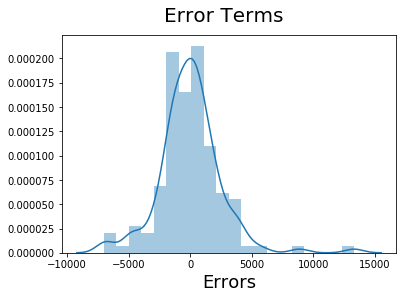

In [115]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

## Step 8: Making Predictions Using the Final Model


Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model

In [116]:
#### Applying the scaling on the test sets
# Rescaling the features using Min-Max scaler

# apply scaler() to all the columns except the '0-1' and 'dummy variables'

num_vars = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio',
'stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [117]:
df_test.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,mfi,mpfi,spdi,spfi,-2,-1,0,1,2,3
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.112903,0.177419,0.564516,0.032258,0.370121,0.486741,0.375212,0.454249,0.371743,0.228835,...,0.016129,0.500000,0.048387,0.016129,0.016129,0.145161,0.274194,0.177419,0.241935,0.145161
std,0.319058,0.385142,0.499868,0.178127,0.179970,0.183964,0.208977,0.234487,0.222354,0.188416,...,0.127000,0.504082,0.216335,0.127000,0.127000,0.355139,0.449749,0.385142,0.431751,0.355139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.265306,0.389764,0.221053,0.264423,0.219125,0.126638,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.327988,0.475591,0.326316,0.485577,0.344065,0.183406,...,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.482507,0.642126,0.421053,0.605769,0.540726,0.287118,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [118]:
df_test.columns

Index([             'fueltype',            'aspiration',
                  'doornumber',        'enginelocation',
                   'wheelbase',             'carlength',
                    'carwidth',             'carheight',
                  'curbweight',            'enginesize',
                   'boreratio',                'stroke',
            'compressionratio',            'horsepower',
                     'peakrpm',               'citympg',
                  'highwaympg',                 'price',
                      'Nissan',           'alfa-romero',
                        'audi',                   'bmw',
                       'buick',             'chevrolet',
                       'dodge',                 'honda',
                       'isuzu',                'jaguar',
                       'maxda',                 'mazda',
                     'mercury',            'mitsubishi',
                      'nissan',               'peugeot',
                    'plymouth',

#### Dividing into X_test and y_test

In [119]:
y_test = df_test.pop('price')
X_test = df_test

In [120]:
list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 35),
 ('aspiration', False, 47),
 ('doornumber', False, 50),
 ('enginelocation', False, 34),
 ('wheelbase', False, 46),
 ('carlength', False, 42),
 ('carwidth', False, 38),
 ('carheight', False, 43),
 ('curbweight', False, 41),
 ('enginesize', False, 36),
 ('boreratio', False, 37),
 ('stroke', False, 40),
 ('compressionratio', False, 39),
 ('horsepower', False, 45),
 ('peakrpm', False, 44),
 ('citympg', False, 49),
 ('highwaympg', False, 48),
 ('Nissan', False, 19),
 ('alfa-romero', False, 29),
 ('audi', True, 1),
 ('bmw', True, 1),
 ('buick', True, 1),
 ('chevrolet', False, 21),
 ('dodge', False, 25),
 ('honda', True, 1),
 ('isuzu', False, 24),
 ('jaguar', True, 1),
 ('maxda', False, 22),
 ('mazda', False, 33),
 ('mercury', False, 16),
 ('mitsubishi', False, 31),
 ('nissan', False, 30),
 ('peugeot', True, 1),
 ('plymouth', False, 26),
 ('porcshce', False, 17),
 ('porsche', True, 1),
 ('renault', False, 28),
 ('saab', True, 1),
 ('subaru', True, 1),
 ('toyota', Fal

In [121]:
col = X_test.columns[rfe.support_]
col

Index([                 'audi',                   'bmw',
                       'buick',                 'honda',
                      'jaguar',               'peugeot',
                     'porsche',                  'saab',
                      'subaru',                 'volvo',
                 'convertible',        'rwd_drivewheel',
             'enginetype_dohc',          'enginetype_l',
              'enginetype_ohc',       'enginetype_ohcf',
             'enginetype_ohcv',  'cylindernumber_eight',
         'cylindernumber_four',    'cylindernumber_six',
        'cylindernumber_three', 'cylindernumber_twelve',
          'cylindernumber_two',                  '1bbl',
                         'idi',                  'mpfi',
                        'spdi',                      -2,
                             0,                       3],
      dtype='object')

In [122]:
X_test.columns[~rfe.support_]

Index([           'fueltype',          'aspiration',          'doornumber',
            'enginelocation',           'wheelbase',           'carlength',
                  'carwidth',           'carheight',          'curbweight',
                'enginesize',           'boreratio',              'stroke',
          'compressionratio',          'horsepower',             'peakrpm',
                   'citympg',          'highwaympg',              'Nissan',
               'alfa-romero',           'chevrolet',               'dodge',
                     'isuzu',               'maxda',               'mazda',
                   'mercury',          'mitsubishi',              'nissan',
                  'plymouth',            'porcshce',             'renault',
                    'toyota',             'toyouta',           'vokswagen',
                'volkswagen',                  'vw',             'hardtop',
                 'hatchback',               'sedan',               'wagon',
            

In [123]:
# Adding constant variable to test dataframe
X_test_m11 = sm.add_constant(X_test)

In [128]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m111 = X_test_m11.filter(['const','cylindernumber_four','mpfi','idi','buick','rwd_drivewheel','bmw','jaguar','volvo','audi','porsche','saab','spdi',0,'enginetype_ohcv'], axis=1)

In [129]:
X_test_m111

,const,cylindernumber_four,mpfi,idi,buick,rwd_drivewheel,bmw,jaguar,volvo,audi,porsche,saab,spdi,0,enginetype_ohcv
160,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
186,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
198,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
75,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [130]:
# Making predictions using the fourth model

y_pred = lr_11.predict(X_test_m111)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0,0.5,'y_pred')

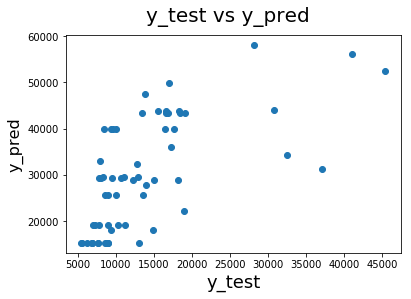

In [131]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    


We can see that the equation of our best fitted line is:

$ price = audi       \times            5634.0328   +
bmw        \times            1.034e+04   +
buick       \times             1.4e+04   +
jaguar       \times          1.625e+04   +
porsche       \times         1.433e+04   +
saab        \times           6001.9500   +
volvo        \times          4881.9371   +
rwd_drivewheel   \times      3417.4178    +
enginetype_ohcv   \times     2094.7641   +
cylindernumber_four \times  -3109.7441    +
idi       \times             3211.4573    +
mpfi       \times            2815.1388    +
spdi        \times           3824.0889   +
0          \times            1801.6994 $

In [132]:
#calculating rsquare value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-3.938043354479724